In [54]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
CUR_DIR = os.getcwd()
# print(f'[DEBUG] current directory: {CUR_DIR}')

[DEBUG] current directory: /Users/Liam/Desktop/git/cs4243_proj


In [157]:
def load_data(file_path):
    n_samples = len(os.listdir(file_path))
    imgs = []
    labels = []
    
    # read from the directory
    for i, img in enumerate(os.listdir(file_path)):
        if (i == 1):
            break
        imgs.append(cv2.resize(cv2.imread(os.path.join(file_path, img), 0), (300, 60)))
        labels.append(img[0:-6])
    
    return np.array(imgs), labels

In [151]:
def preprocessing_image(imgs):
    # Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = [clahe.apply(img) for img in imgs]
    
    # # Edge-preserving bilateral filter
    # filtered = [cv2.bilateralFilter(img, 9, 75, 75) for img in enhanced]
    
    # Local thresholding to preserve weak characters
    binary = [cv2.adaptiveThreshold(img, 255, 
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY_INV, 11, 4) for img in enhanced]

    # # Horizontal line removal
    # horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
    # detected_lines = [cv2.morphologyEx(img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2) for img in binary]
    # cleaned = [cv2.subtract(img, detected_lines) for (img, detected_lines) in zip(binary, detected_lines)]
    
    return chars

In [177]:
def tokenisation(imgs):

    # Stronger binarization (adjust threshold)
    _, thresh = cv2.threshold(imgs, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Remove small noise
    kernel = np.ones((2,2), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # Find contours (connected components)
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract bounding boxes & sort left-to-right
    boxes = [cv2.boundingRect(c) for c in contours]
    boxes = sorted(boxes, key=lambda x: x[0])  # Sort by x-coordinate
    
    # Crop characters
    chars = []
    for x, y, w, h in boxes:
        char = imgs[y:y+h, x:x+w]
        chars.append(char)

    return chars

In [189]:
def train():
    print('[INFO] start training')
    imgs, labels = load_data('./data/train')

    # print the original img
    plt.figure(figsize=(8,8))
    for i in range(len(imgs)):
        plt.subplot(5, 2, i+1)
        plt.imshow(imgs[i])
        plt.xlabel(f"{labels[i]}")
    plt.show()

    # processed_imgs = preprocessing_image(imgs)
    chars = tokenisation(imgs[0])

    # print the processed img
    plt.figure(figsize=(8,8))
    for i in range(len(chars)):
        plt.subplot(5, 2, i+1)
        plt.imshow(chars[i])
    plt.show()

    # for char in chars:
    #     plt.figure(figsize=(8,8))
    #     plt.imshow(char)
    #     plt.show()
    #     plt.close()

[INFO] start training


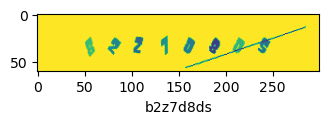

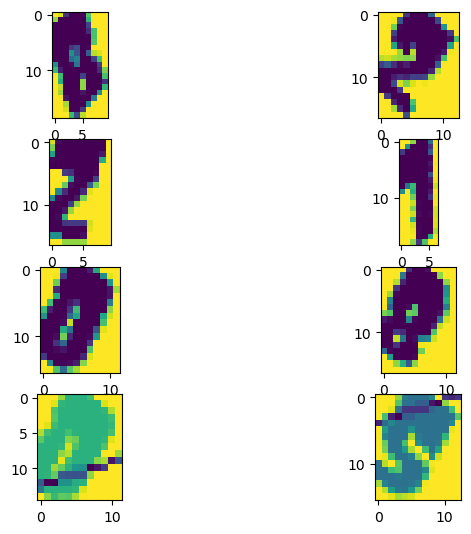

In [191]:
if __name__ == '__main__':
    train()